In [1]:
from datetime import datetime, timedelta

In [2]:
datetime(year=2022, month=12, day=3)

datetime.datetime(2022, 12, 3, 0, 0)

In [3]:
datetime(year=2022, month=12, day=3, hour=13, minute=59, second=44)

datetime.datetime(2022, 12, 3, 13, 59, 44)

In [4]:
datetime.now()

datetime.datetime(2022, 12, 3, 14, 0, 12, 455917)

In [5]:
datetime.now() - timedelta(days=1)

datetime.datetime(2022, 12, 2, 14, 0, 29, 734754)

In [6]:
now = datetime.now()

print(now.year, now.month, now.day, now.hour, now.minute, now.second, sep="\n")

2022
12
3
14
1
16


In [7]:
date_list = [
    datetime(2022, 12, 1),
    datetime(2022, 12, 2),
    datetime(2022, 12, 3)
]
date_list

[datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 12, 2, 0, 0),
 datetime.datetime(2022, 12, 3, 0, 0)]

In [8]:
import numpy as np

date_list = np.array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64')
date_list

array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64[D]')

In [9]:
date_list = np.array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64[s]')
date_list

array(['2022-12-01T00:00:00', '2022-12-02T00:00:00',
       '2022-12-03T00:00:00'], dtype='datetime64[s]')

In [10]:
date_list = np.array(['2022-12-01', '2022-12-02', '2022-12-03'], dtype='datetime64[Y]')
date_list

array(['2022', '2022', '2022'], dtype='datetime64[Y]')

In [11]:
date_list = np.arange('2022-12-01', '2022-12-05', dtype='datetime64[D]')
date_list

array(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04'],
      dtype='datetime64[D]')

In [12]:
import pandas as pd

date_list = pd.date_range(start='2022-12-01', end='2022-12-05')
date_list

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05'],
              dtype='datetime64[ns]', freq='D')

In [13]:
date_list = pd.date_range(start='2022-12-01', periods=10, freq='D')
date_list

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-10'],
              dtype='datetime64[ns]', freq='D')

In [14]:
date_list.min()

Timestamp('2022-12-01 00:00:00', freq='D')

In [15]:
date_list.max()

Timestamp('2022-12-10 00:00:00', freq='D')

In [16]:
import pandas as pd

df = pd.read_csv('LTOTALNSA.csv', index_col='DATE', parse_dates=True)
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


In [17]:
yearly_totals = df.resample(rule='Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


In [18]:
quarterly_means = df.resample(rule='Q').mean()
quarterly_means

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667
...,...
2020-06-30,978.465333
2020-09-30,1298.604000
2020-12-31,1387.852000


In [19]:
df_shift = df.copy()

df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)

df_shift.head()

,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


In [21]:
df_shift = df.copy()

df_shift['Shift_Neg_1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Shift_Neg_2'] = df_shift['LTOTALNSA'].shift(-2)

df_shift.tail()

,LTOTALNSA,Shift_Neg_1,Shift_Neg_2
DATE,,,
2021-01-01,1103.691,1197.804,1599.859
2021-02-01,1197.804,1599.859,1534.103
2021-03-01,1599.859,1534.103,1577.897
2021-04-01,1534.103,1577.897,NaN
2021-05-01,1577.897,NaN,NaN


In [22]:
df_rolling = df.copy()

df_rolling['Quarterly_Rolling'] = df_rolling['LTOTALNSA'].rolling(window=3).mean()
df_rolling['Yearly_Rolling'] = df_rolling['LTOTALNSA'].rolling(window=12).mean()

df_rolling.head(15)

,LTOTALNSA,Quarterly_Rolling,Yearly_Rolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


In [23]:
df_diff = df.copy()

df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods=1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods=2)

df_diff.head()

,LTOTALNSA,Diff_1,Diff_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,108.7,NaN
1976-03-01,1216.1,242.8,351.5
1976-04-01,1163.2,-52.9,189.9
1976-05-01,1176.1,12.9,-40.0


In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 14, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#101010'])
rcParams['lines.linewidth'] = 2

from IPython import display
display.set_matplotlib_formats("svg")

/var/folders/_p/0615yhdd3nx3lvw2w2tnjvqw0000gn/T/ipykernel_80584/3312756354.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


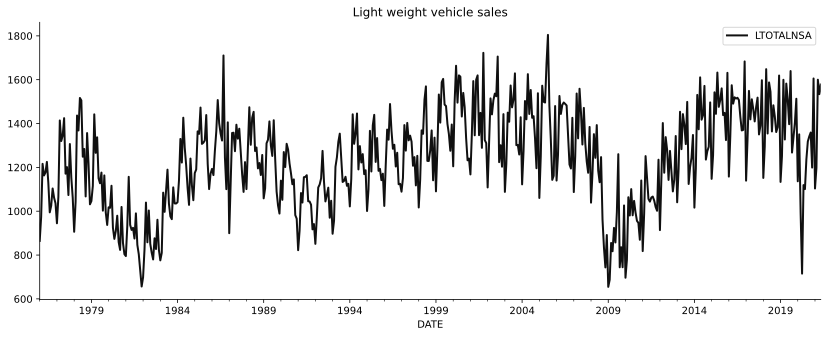

In [28]:
df.plot(title='Light weight vehicle sales');

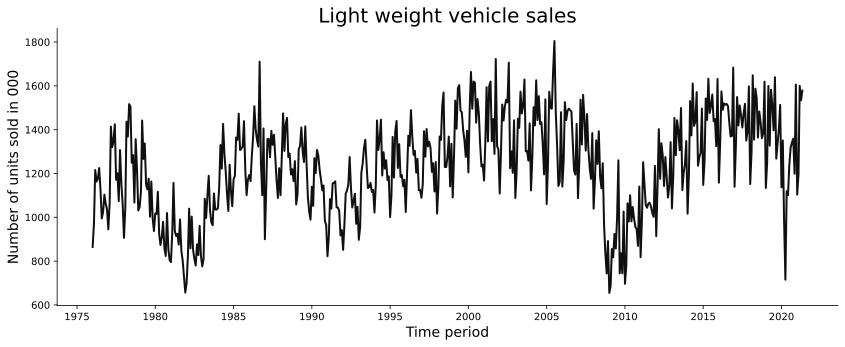

In [29]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']);

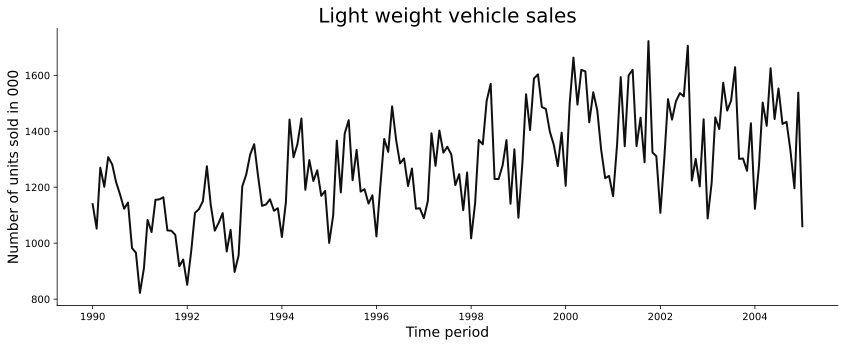

In [30]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']['1990-01-01':'2005-01-01']);

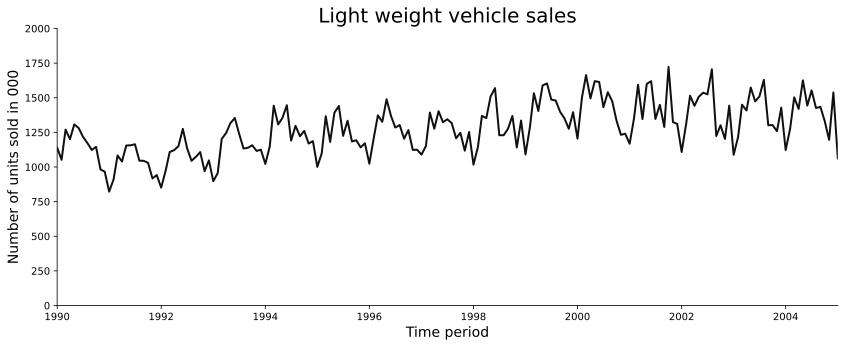

In [31]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.xlim(np.array(['1990-01-01', '2005-01-01'], dtype='datetime64'))
plt.ylim([0, 2000])

plt.plot(df['LTOTALNSA']);